# Analyzing_and_Visualizing_Data
In this segment, the analysis of the data set and corresponding visulizations to conclude various valuable conclusions.

1. Visualizing the total number of tweets over time to see whether that number increases, or decreases, over time.
2. Visualizing the retweet counts, and favorite counts comparison over time.
3. Visualizing the most popular dog breed
4. Visualizing the most popular dog names

In [12]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
matplotlib.style.use('ggplot')

In [4]:
archive_master_clean = pd.read_csv('twitter_archive_master.csv')
archive_master_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type,rating
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,...,bagel,0.085851,False,banana,0.076110,False,36370,7739,NaN,1.3
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,...,Pekinese,0.090647,True,papillon,0.068957,True,31317,5730,NaN,1.3
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,...,malamute,0.078253,True,kelpie,0.031379,True,23602,3790,NaN,1.2
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,39660,7895,NaN,1.3
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,37857,8524,NaN,1.2


### ***1***

Visualizing the total number of tweets over time to see whether that number increases, or decreases, over time.

In [6]:
archive_master_clean.timestamp = pd.to_datetime(archive_master_clean['timestamp'], 
                                                format='%Y-%m-%d %H:%M:%S.%f')

monthly_tweets = archive_master_clean.groupby(pd.Grouper(key = 'timestamp',
                                                         freq = "M")).count().reset_index()
monthly_tweets = archive_master_clean[['timestamp',
                                       'tweet_id']]

In [7]:
monthly_tweets.head()

,timestamp,tweet_id
0,2017-08-01 16:23:56,892420643555336193
1,2017-08-01 00:17:27,892177421306343426
2,2017-07-31 00:18:03,891815181378084864
3,2017-07-30 15:58:51,891689557279858688
4,2017-07-29 16:00:24,891327558926688256


In [8]:
monthly_tweets.sum()

tweet_id    4396844578529211630
dtype: int64

Text(0.5, 1.0, 'WeRateDogs Tweets over Time')

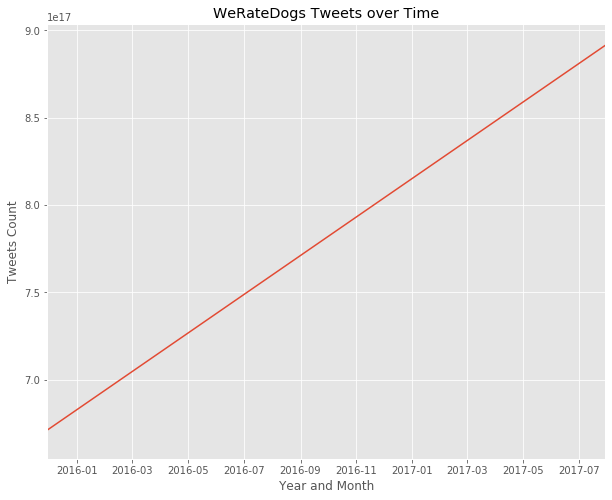

In [9]:
plt.figure(figsize=(10, 8))
plt.xlim([datetime.date(2015, 11, 30), datetime.date(2017, 7, 30)]) 

plt.xlabel('Year and Month')
plt.ylabel('Tweets Count')

plt.plot(monthly_tweets.timestamp, monthly_tweets.tweet_id)
plt.title('WeRateDogs Tweets over Time')

### ***2***

Analyze and Visualize: Visualizing the retweet counts, and favorite counts comparison over time.

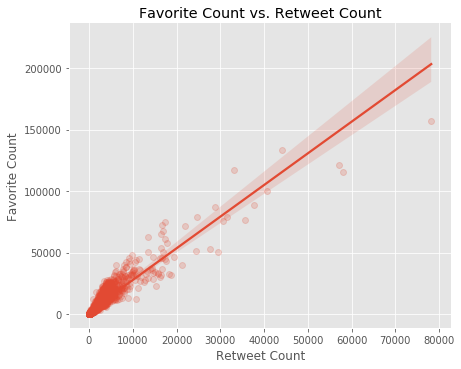

In [13]:
sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=archive_master_clean,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5});

plt.title('Favorite Count vs. Retweet Count');
plt.xlabel('Retweet Count');
plt.ylabel('Favorite Count');

### **3**
Visualizing the most popular dog breed

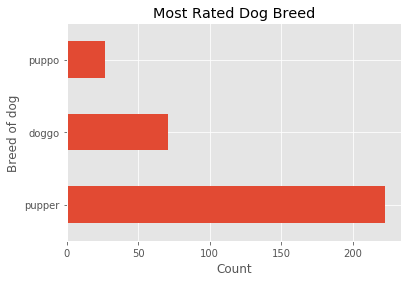

In [38]:
dog_breed = archive_master_clean.groupby('dog_type').filter(lambda x: len(x) >= 25)

dog_breed['dog_type'].value_counts().plot(kind = 'barh')
plt.title('Most Rated Dog Breed')
plt.xlabel('Count')
plt.ylabel('Breed of dog');

### ***4***
Visualizing the most popular dog names

Text(0.5, 0, 'Number of Dogs')

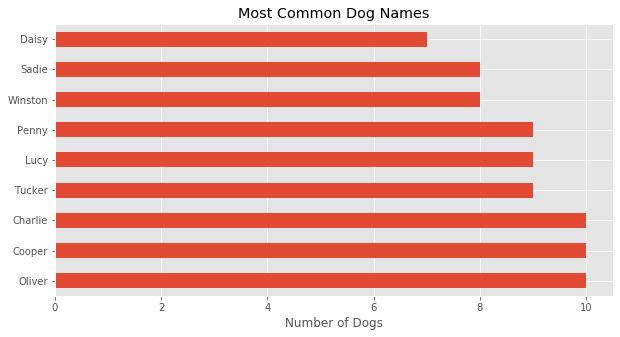

In [46]:
archive_master_clean.name.value_counts()[1:10].plot(kind='barh', figsize=(10,5), title='Most Common Dog Names').set_xlabel("Number of Dogs")

In [33]:
archive_master_clean.name.value_counts()

None        644
Oliver       10
Cooper       10
Charlie      10
Tucker        9
           ... 
Clybe         1
Traviss       1
Ulysses       1
Kollin        1
Leonidas      1
Name: name, Length: 912, dtype: int64

The top 3 most popular dog names are:
- Oliver
- Cooper
- Charlie
- Lucy
